In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from xgboost import plot_importance
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

In [2]:
data_x = pd.read_csv("x_under_cvd_death.csv")

In [3]:
data_x

,Unnamed: 0,T,delta_t,CT,prop_s,t_sys,t_dia,t_ratio,prop_delta_t,t_p1in_dia,...,Smoking status_Prefer not to answer,Smoking status_Previous,Sex_Female,Sex_Male,Ethnic background_Asian,Ethnic background_Black,Ethnic background_other including mixed,Ethnic background_white/not recorded,bp medication_0.0,bp medication_1.0
0,0,0.84857,0.14571,0.197140,0.23232,0.29143,0.55714,0.52308,0.17172,0.16286,...,0,0,0,1,0,0,0,1,1,0
1,1,0.71566,0.18795,0.180720,0.25253,0.29639,0.41928,0.70690,0.26263,0.21687,...,0,1,1,0,0,0,0,1,1,0
2,2,0.69070,0.23023,0.167440,0.24242,0.31395,0.37674,0.83333,0.33333,0.34884,...,0,1,0,1,0,0,0,1,1,0
3,3,0.78158,0.23684,0.126320,0.16162,0.32368,0.45789,0.70690,0.30303,0.21316,...,0,0,1,0,0,0,0,1,0,1
4,4,0.67500,0.26591,0.095455,0.14141,0.27955,0.39545,0.70690,0.39394,0.22500,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,931,1.10000,0.20000,0.266670,0.24242,0.40000,0.70000,0.57143,0.18182,0.27778,...,0,1,0,1,0,0,0,1,0,1
932,932,0.82500,0.16667,0.158330,0.19192,0.29167,0.53333,0.54688,0.20202,0.15833,...,0,0,0,1,0,0,0,1,0,1
933,933,0.80270,0.21892,0.162160,0.20202,0.33243,0.47027,0.70690,0.27273,0.19459,...,0,0,0,1,0,1,0,0,0,1
934,934,0.90000,0.17273,0.200000,0.22222,0.31818,0.58182,0.54688,0.19192,0.20000,...,0,1,0,1,0,0,0,1,1,0


In [4]:
data_x.shape

(936, 65)

In [5]:
data_crf = data_x.iloc[:, 46:65]

In [6]:
data_crf.head()

,Age when attended assessment centre,mean sbp,BMI,cholesterol HDL ratio,Diabetes diagnosed by doctor_No,Diabetes diagnosed by doctor_Prefer not to answer,Diabetes diagnosed by doctor_Yes,Smoking status_Current,Smoking status_Never,Smoking status_Prefer not to answer,Smoking status_Previous,Sex_Female,Sex_Male,Ethnic background_Asian,Ethnic background_Black,Ethnic background_other including mixed,Ethnic background_white/not recorded,bp medication_0.0,bp medication_1.0
0,63.0,128.0,25.997940,5.274432,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0
1,62.0,133.0,27.323326,3.120285,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0
2,57.0,134.0,25.872479,5.729126,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0
3,65.0,145.0,32.356315,3.112490,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1
4,46.0,134.5,27.253669,4.809663,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0


In [7]:
data_crf.shape

(936, 19)

In [10]:
data_crf.size

17784

In [8]:
X = data_crf.values

In [9]:
X.size

17784

In [27]:
X

array([[ 63.        , 128.        ,  25.99794014, ...,   1.        ,
          1.        ,   0.        ],
       [ 62.        , 133.        ,  27.32332602, ...,   1.        ,
          1.        ,   0.        ],
       [ 57.        , 134.        ,  25.87247917, ...,   1.        ,
          1.        ,   0.        ],
       ...,
       [ 67.        , 152.5       ,  28.44095498, ...,   0.        ,
          0.        ,   1.        ],
       [ 62.        , 193.5       ,  25.62977989, ...,   1.        ,
          1.        ,   0.        ],
       [ 67.        , 145.        ,  30.33613183, ...,   1.        ,
          0.        ,   1.        ]])

In [11]:
# reading the output variable

In [12]:
data_y = pd.read_csv("y_under_cvd_death.csv")

In [13]:
data_y

,Unnamed: 0,cvd_death
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
931,931,1
932,932,1
933,933,1
934,934,1


In [14]:
data_y = data_y.drop(['Unnamed: 0'], axis=1)

In [15]:
data_y

,cvd_death
0,0
1,0
2,0
3,0
4,0
...,...
931,1
932,1
933,1
934,1


In [17]:
data_y.size

936

In [18]:
y = data_y.values

In [19]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [20]:
y.size

936

In [21]:
# nested cv

In [22]:
cv_outer = KFold(n_splits=3, shuffle=True, random_state=42)

best_auc = []
predict_prob = []
feature_imp = []

In [23]:
type(X)

numpy.ndarray

In [24]:
type(y)

numpy.ndarray

In [29]:
X[3,0]

65.0

best auc score is : 
0.7823635785179673
[[0.57138646 0.42861357]
 [0.37153566 0.62846434]
 [0.8652294  0.13477057]
 [0.7536321  0.24636787]
 [0.23506999 0.76493   ]
 [0.7950947  0.2049053 ]
 [0.47495472 0.5250453 ]
 [0.6655479  0.3344521 ]
 [0.63333094 0.36666906]
 [0.8593298  0.1406702 ]
 [0.55812156 0.44187844]
 [0.17796397 0.822036  ]
 [0.4106769  0.5893231 ]
 [0.85552526 0.14447474]
 [0.6117438  0.38825622]
 [0.6499623  0.35003766]
 [0.41779572 0.5822043 ]
 [0.2560022  0.7439978 ]
 [0.57505953 0.42494044]
 [0.6327299  0.36727008]
 [0.6437843  0.35621572]
 [0.86486566 0.13513434]
 [0.6471082  0.35289183]
 [0.57596946 0.42403054]
 [0.39999658 0.6000034 ]
 [0.714329   0.285671  ]
 [0.63671064 0.36328936]
 [0.5806353  0.41936472]
 [0.5703181  0.42968193]
 [0.31385136 0.68614864]
 [0.4928975  0.5071025 ]
 [0.39889556 0.60110444]
 [0.7496644  0.25033554]
 [0.8572432  0.14275685]
 [0.5234449  0.4765551 ]
 [0.5687547  0.43124533]
 [0.504485   0.495515  ]
 [0.68546546 0.31453457]
 [0.829294

best auc score is : 
0.7798056762058784
[[0.55676645 0.44323355]
 [0.43094426 0.56905574]
 [0.7221071  0.2778929 ]
 [0.8917399  0.10826011]
 [0.58753633 0.41246364]
 [0.18519801 0.814802  ]
 [0.47915578 0.5208442 ]
 [0.8074071  0.19259292]
 [0.4812503  0.5187497 ]
 [0.8037462  0.19625378]
 [0.30965286 0.69034714]
 [0.19095355 0.80904645]
 [0.38625467 0.61374533]
 [0.958957   0.04104296]
 [0.56087023 0.43912977]
 [0.36614662 0.6338534 ]
 [0.8920902  0.10790978]
 [0.3243006  0.6756994 ]
 [0.6402284  0.35977164]
 [0.623665   0.376335  ]
 [0.37515146 0.62484854]
 [0.6373852  0.3626148 ]
 [0.3654685  0.6345315 ]
 [0.2763061  0.7236939 ]
 [0.7138696  0.28613043]
 [0.81009614 0.18990387]
 [0.9155934  0.08440661]
 [0.86948955 0.13051046]
 [0.82872045 0.17127956]
 [0.56190383 0.4380962 ]
 [0.35804063 0.64195937]
 [0.8130217  0.18697827]
 [0.8641479  0.13585211]
 [0.7843531  0.21564691]
 [0.73332834 0.26667163]
 [0.5642055  0.43579447]
 [0.7153445  0.2846555 ]
 [0.820908   0.17909199]
 [0.560127

best auc score is : 
0.7577663137016305
[[0.65752125 0.34247872]
 [0.8366063  0.16339366]
 [0.5502782  0.4497218 ]
 [0.28349245 0.71650755]
 [0.40555078 0.5944492 ]
 [0.38529873 0.6147013 ]
 [0.5282593  0.4717407 ]
 [0.4891981  0.5108019 ]
 [0.46129906 0.53870094]
 [0.44093335 0.55906665]
 [0.75232613 0.2476739 ]
 [0.863207   0.13679303]
 [0.4979812  0.5020188 ]
 [0.34276336 0.65723664]
 [0.8747296  0.12527043]
 [0.56983596 0.43016404]
 [0.43302262 0.5669774 ]
 [0.6750556  0.32494438]
 [0.38111347 0.61888653]
 [0.4691351  0.5308649 ]
 [0.6487442  0.35125574]
 [0.44392794 0.55607206]
 [0.56216645 0.43783355]
 [0.6222317  0.37776828]
 [0.59877455 0.40122548]
 [0.7376466  0.26235345]
 [0.8369523  0.16304766]
 [0.8598458  0.1401542 ]
 [0.37053227 0.6294677 ]
 [0.710327   0.28967297]
 [0.2987373  0.7012627 ]
 [0.42884696 0.57115304]
 [0.54556525 0.45443478]
 [0.7186934  0.2813066 ]
 [0.567748   0.432252  ]
 [0.5766886  0.4233114 ]
 [0.4568053  0.5431947 ]
 [0.61352205 0.38647792]
 [0.699082

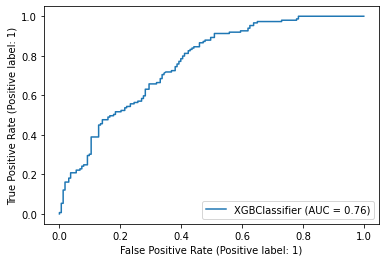

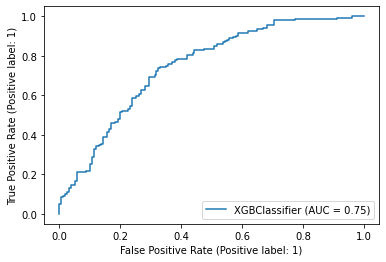

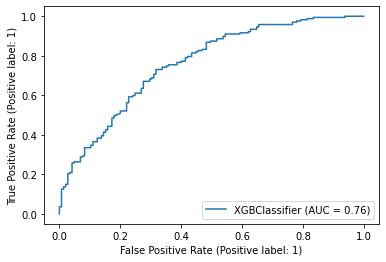

In [30]:
for train_ix, test_ix in cv_outer.split(X):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=42)
	# define the model
	model = XGBClassifier(objective= 'binary:logistic', random_state=42)
	# define search space
	space = dict()
	space['n_estimators'] = [100, 250, 500, 750]
	space['max_depth'] = [3, 5, 10, 15]
	space['learning_rate'] = [0.3, 0.1, 0.01]
	space['colsample_bytree'] = [0.5, 0.8]
	# define search
	search = GridSearchCV(model, space, scoring='roc_auc', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train, y_train)
	roc_auc_score = result.best_score_
	print("best auc score is : ")
	print(roc_auc_score)
	best_auc.append(roc_auc_score)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test)
	# predict proba
	y_pred_proba = best_model.predict_proba(X_test)
	print(y_pred_proba)    
	predict_prob.append(y_pred_proba)
	# evaluate the model
	acc_on_test = accuracy_score(y_test, yhat)
	print("accuracy on test data: ")
	print(acc_on_test)
	# store the result
	# cm
	cm = confusion_matrix(y_test, yhat)
	# 
	print(cm)
	# class report
	classif_report = classification_report(y_test, yhat)
	print(classif_report)
	#
	RocCurveDisplay.from_estimator(best_model, X_test, y_test)
	# feature_importances_
	f_i = best_model.feature_importances_
	print("feature importances are: ")
	print(f_i)
	feature_imp.append(f_i)
	# best parameters
	print("best parametrs: ")    
	print(result.best_params_)

In [31]:
best_auc

[0.7823635785179673, 0.7798056762058784, 0.7577663137016305]

In [49]:
round(mean(best_auc),2)

0.77

In [32]:
feature_imp

[array([0.1180983 , 0.05323038, 0.05637647, 0.03240488, 0.07131336,
        0.        , 0.06402514, 0.069338  , 0.08736511, 0.        ,
        0.02596631, 0.13306001, 0.12394668, 0.        , 0.00413758,
        0.01499554, 0.00666777, 0.07601591, 0.06305853], dtype=float32),
 array([0.10513899, 0.06109527, 0.06100359, 0.03705989, 0.05192284,
        0.        , 0.08359302, 0.10487296, 0.05140579, 0.        ,
        0.0362411 , 0.10942782, 0.09361029, 0.02403432, 0.        ,
        0.00624016, 0.01549765, 0.07906668, 0.07978969], dtype=float32),
 array([0.11234964, 0.05744496, 0.04283938, 0.04869815, 0.04558704,
        0.        , 0.05570636, 0.07877301, 0.06390287, 0.        ,
        0.01676164, 0.15091085, 0.12739614, 0.01121842, 0.        ,
        0.01425951, 0.02277476, 0.08414507, 0.06723227], dtype=float32)]

In [37]:
feature_imp[2]

array([0.11234964, 0.05744496, 0.04283938, 0.04869815, 0.04558704,
       0.        , 0.05570636, 0.07877301, 0.06390287, 0.        ,
       0.01676164, 0.15091085, 0.12739614, 0.01121842, 0.        ,
       0.01425951, 0.02277476, 0.08414507, 0.06723227], dtype=float32)

In [38]:
df_FI_0 = pd.DataFrame(feature_imp[0], columns = ['first'])
df_FI_1 = pd.DataFrame(feature_imp[1], columns = ['second'])
df_FI_2 = pd.DataFrame(feature_imp[2], columns = ['third'])

In [39]:
df_FI_0

,first
0,0.118098
1,0.053230
2,0.056376
3,0.032405
4,0.071313
5,0.000000
6,0.064025
7,0.069338
8,0.087365
9,0.000000


In [40]:
df_final_FI = pd.concat([df_FI_0, df_FI_1, df_FI_2], axis = 1)

In [41]:
df_final_FI

,first,second,third
0,0.118098,0.105139,0.112350
1,0.053230,0.061095,0.057445
2,0.056376,0.061004,0.042839
3,0.032405,0.037060,0.048698
4,0.071313,0.051923,0.045587
5,0.000000,0.000000,0.000000
6,0.064025,0.083593,0.055706
7,0.069338,0.104873,0.078773
8,0.087365,0.051406,0.063903
9,0.000000,0.000000,0.000000


In [42]:
df_final_FI.to_csv("FI_values_cvd_death_only_crf.csv")

In [43]:
predict_prob[0]

array([[0.57138646, 0.42861357],
       [0.37153566, 0.62846434],
       [0.8652294 , 0.13477057],
       [0.7536321 , 0.24636787],
       [0.23506999, 0.76493   ],
       [0.7950947 , 0.2049053 ],
       [0.47495472, 0.5250453 ],
       [0.6655479 , 0.3344521 ],
       [0.63333094, 0.36666906],
       [0.8593298 , 0.1406702 ],
       [0.55812156, 0.44187844],
       [0.17796397, 0.822036  ],
       [0.4106769 , 0.5893231 ],
       [0.85552526, 0.14447474],
       [0.6117438 , 0.38825622],
       [0.6499623 , 0.35003766],
       [0.41779572, 0.5822043 ],
       [0.2560022 , 0.7439978 ],
       [0.57505953, 0.42494044],
       [0.6327299 , 0.36727008],
       [0.6437843 , 0.35621572],
       [0.86486566, 0.13513434],
       [0.6471082 , 0.35289183],
       [0.57596946, 0.42403054],
       [0.39999658, 0.6000034 ],
       [0.714329  , 0.285671  ],
       [0.63671064, 0.36328936],
       [0.5806353 , 0.41936472],
       [0.5703181 , 0.42968193],
       [0.31385136, 0.68614864],
       [0.

In [44]:
df_predict_0 = pd.DataFrame(predict_prob[0], columns = ['first_0','first_1'])
df_predict_1 = pd.DataFrame(predict_prob[1], columns = ['second_0','second_1'])
df_predict_2 = pd.DataFrame(predict_prob[2], columns = ['third_0','third_1'])

In [45]:
df_predict_0

,first_0,first_1
0,0.571386,0.428614
1,0.371536,0.628464
2,0.865229,0.134771
3,0.753632,0.246368
4,0.235070,0.764930
...,...,...
307,0.632576,0.367424
308,0.404681,0.595319
309,0.274637,0.725363
310,0.128369,0.871631


In [46]:
df_final_pred = pd.concat([df_predict_0, df_predict_1, df_predict_2], axis = 1)

In [47]:
df_final_pred

,first_0,first_1,second_0,second_1,third_0,third_1
0,0.571386,0.428614,0.556766,0.443234,0.657521,0.342479
1,0.371536,0.628464,0.430944,0.569056,0.836606,0.163394
2,0.865229,0.134771,0.722107,0.277893,0.550278,0.449722
3,0.753632,0.246368,0.891740,0.108260,0.283492,0.716508
4,0.235070,0.764930,0.587536,0.412464,0.405551,0.594449
...,...,...,...,...,...,...
307,0.632576,0.367424,0.302176,0.697824,0.647793,0.352207
308,0.404681,0.595319,0.228006,0.771994,0.400866,0.599134
309,0.274637,0.725363,0.768343,0.231657,0.498152,0.501848
310,0.128369,0.871631,0.215540,0.784460,0.277593,0.722407


In [48]:
df_final_pred.to_csv("prob_values_cvd_death_only_crf.csv")

In [51]:
# sensitivity and specificity

In [52]:
# sensitivity for class '0' which is also specificity

In [54]:
sensitivity_class_zero = [0.64,0.68, 0.69]

In [57]:
print("sensitivity of class zero: ", round(mean(sensitivity_class_zero),2))


sensitivity of class zero:  0.67


In [58]:
# sensitivity for class one

In [59]:
sensitivity_class_one = [0.72, 0.72, 0.69]

In [60]:
print("sensitivity of class one: ", round(mean(sensitivity_class_one),2))

sensitivity of class one:  0.71


In [62]:
print(best_model.importance_type)

None


In [63]:
best_model.feature_importances_

array([0.11234964, 0.05744496, 0.04283938, 0.04869815, 0.04558704,
       0.        , 0.05570636, 0.07877301, 0.06390287, 0.        ,
       0.01676164, 0.15091085, 0.12739614, 0.01121842, 0.        ,
       0.01425951, 0.02277476, 0.08414507, 0.06723227], dtype=float32)

In [7]:
# Getting AUC from outer loop, average over 3 folds

In [3]:
auc_outer_loop = [0.76, 0.75, 0.76]

In [4]:
auc_outer_loop_mean = round(mean(auc_outer_loop),2)

In [5]:
print(auc_outer_loop_mean)

0.76
